In [1]:
%matplotlib notebook

from libsignetsim import SbmlDocument, EquilibriumPointCurve
from matplotlib import pyplot as plt

color_scheme = ['#7ac142','#273d15','#507e2b','#a1ff57']

In [2]:
doc = SbmlDocument()
doc.readSbmlFromFile("sbml_files/ras_das.xml")
doc.model.listOfVariables.getBySbmlId("sos").setValue(0)
doc.model.listOfVariables.getBySbmlId("total_sos").setValue(0)

In [3]:
parameter = doc.model.listOfVariables.getBySbmlId("total_sos")
variable = doc.model.listOfVariables.getBySbmlId("ras_gtp")
ds = 0.1
max_steps = 200
fromValue = 0
toValue = 500

In [4]:
curve = EquilibriumPointCurve(doc.model)
curve.setParameter(parameter)
curve.setRange(fromValue, toValue)
curve.setDs(ds)
curve.setMaxSteps(max_steps)
curve.build()
curve.run()

<IPython.core.display.Javascript object>


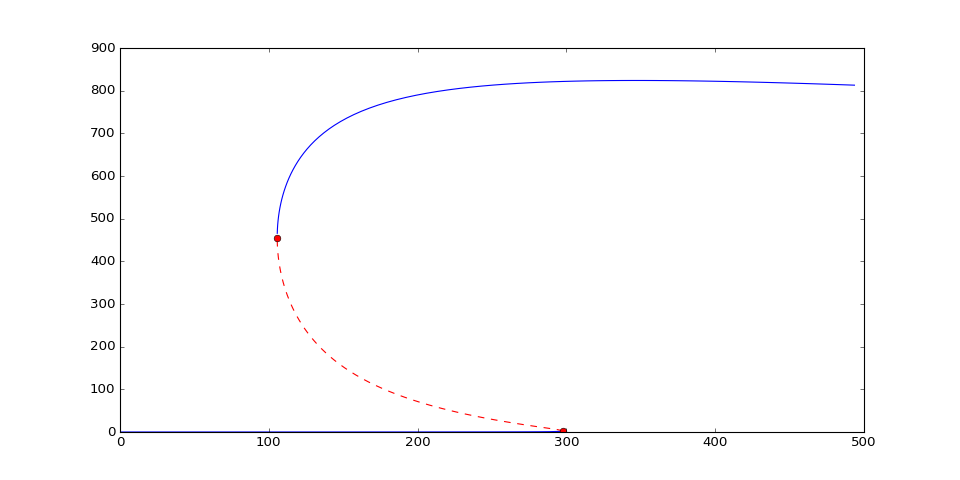

In [5]:
figure = plt.figure(figsize=(12, 6))
plot = figure.add_subplot(111)
curve.plotCurve(plot, variable)